<a href="https://colab.research.google.com/github/debarghyakundu123/SNAKE-/blob/main/sign_language_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install super_gradients==3.1.0

  Using cached super_gradients-3.1.0-py3-none-any.whl (965 kB)
  Using cached torch-1.13.1-cp310-cp310-manylinux1_x86_64.whl (887.5 MB)
  Using cached pycocotools-2.0.4.tar.gz (106 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_runtime_cu11-11.7.99-py3-none-manylinux1_x86_64.whl (849 kB)
  Using cached nvidia_cudnn_cu11-8.5.0.96-2-py3-none-manylinux1_x86_64.whl (557.1 MB)
  Using cached nvidia_cublas_cu11-11.10.3.66-py3-none-manylinux1_x86_64.whl (317.1 MB)
  Using cached nvidia_cuda_nvrtc_cu11-11.7.99-2-py3-none-manylinux1_x86_64.whl (21.0 MB)
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
  Using cached torchvision-0.16.2-cp310-cp310-manylinux1_x86_64.whl (6.8 MB)
  Using cached torchvision-0.16.1-cp310-cp310-manylinux1_x86_64.whl (6.8 MB)
  Using cached torchvision-0

In [2]:
pip install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI


  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-yuia6wuy
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-yuia6wuy
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp310-cp310-linux_x86_64.whl size=375552 sha256=bd974b76b0d4e621876649bd6022f050c33a56e91c5281d10a611d777675ccb6
  Stored in directory: /tmp/pip-ephem-wheel-cache-8ymciqii/wheels/39/61/b4/480fbddb4d3d6bc34083e7397bc6f5d1381f79acc68e9f3511
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.6
    Uninstalling pycocotools-2.0.6:
      Successfully uninstalled pycocotools-2.0.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the f

In [3]:
pip install super_gradients

  Using cached pycocotools-2.0.6-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0
    Uninstalling pycocotools-2.0:
      Successfully uninstalled pycocotools-2.0


In [4]:
%%capture
!pip install super_gradients
!pip install imutils
!pip install roboflow
!pip install pytube --upgrade

In [5]:
from super_gradients.training import Trainer
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val

The console stream is logged into /root/sg_logs/console.log


[2024-01-18 07:05:10] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2024-01-18 07:05:10] WARNING - __init__.py - Failed to import pytorch_quantization
[2024-01-18 07:05:10] INFO - utils.py - NumExpr defaulting to 2 threads.
[2024-01-18 07:05:19] WARNING - calibrator.py - Failed to import pytorch_quantization
[2024-01-18 07:05:19] WARNING - export.py - Failed to import pytorch_quantization
[2024-01-18 07:05:19] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [6]:
from IPython.display import clear_output


In [7]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback


In [8]:
from super_gradients.training import models


In [9]:
CHECKPOINT_DIR = 'checkpoints2'
trainer = Trainer(experiment_name='sign_yolonas_run2', ckpt_root_dir=CHECKPOINT_DIR)

In [10]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="IuYv6KOKs5p62rFSLvGa")
project = rf.workspace("david-lee-d0rhs").project("american-sign-language-letters")
dataset = project.version(6).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to American-Sign-Language-Letters-6 in yolov5pytorch::   5%|▍         | 69/1452 [00:00<00:02, 689.41it/s]

Extracting Dataset Version Zip to American-Sign-Language-Letters-6 in yolov5pytorch::  83%|████████▎ | 1203/1452 [00:01<00:00, 1652.28it/s]

In [11]:
dataset_params = {
    'data_dir':'/content/American-Sign-Language-Letters-6',
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': ['A', 'B', 'C', 'D', 'E', 'F', 'G','H', 'I', 'J', 'K', 'L','M','N','O', 'P', 'Q', 'R', 'S', 'T', 'U',  'V', 'W', 'X', 'Y', 'Z']
}



In [12]:
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

clear_output()

In [13]:
#step7
train_data.dataset.transforms


[DetectionMosaic('additional_samples_count': 3, 'non_empty_targets': False, 'prob': 1.0, 'input_dim': (640, 640), 'enable_mosaic': True, 'border_value': 114),
 DetectionRandomAffine('additional_samples_count': 0, 'non_empty_targets': False, 'degrees': 10.0, 'translate': 0.1, 'scale': [0.1, 2], 'shear': 2.0, 'target_size': (640, 640), 'enable': True, 'filter_box_candidates': True, 'wh_thr': 2, 'ar_thr': 20, 'area_thr': 0.1, 'border_value': 114),
 DetectionMixup('additional_samples_count': 1, 'non_empty_targets': True, 'input_dim': (640, 640), 'mixup_scale': [0.5, 1.5], 'prob': 1.0, 'enable_mixup': True, 'flip_prob': 0.5, 'border_value': 114),
 DetectionHSV('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 1.0, 'hgain': 5, 'sgain': 30, 'vgain': 30, 'bgr_channels': (0, 1, 2), '_additional_channels_warned': False),
 DetectionHorizontalFlip('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 0.5),
 DetectionPaddedRescale('additional_samples_count': 0, 'non_em

In [14]:
train_data.dataset.dataset_params['transforms'][1]


{'DetectionRandomAffine': {'degrees': 10.0, 'translate': 0.1, 'scales': [0.1, 2], 'shear': 2.0, 'target_size': [640, 640], 'filter_box_candidates': True, 'wh_thr': 2, 'area_thr': 0.1, 'ar_thr': 20}}

In [15]:
train_data.dataset.dataset_params['transforms'][1]['DetectionRandomAffine']['degrees'] = 10.42


Indexing dataset annotations: 100%|██████████| 72/72 [00:00<00:00, 3321.12it/s]


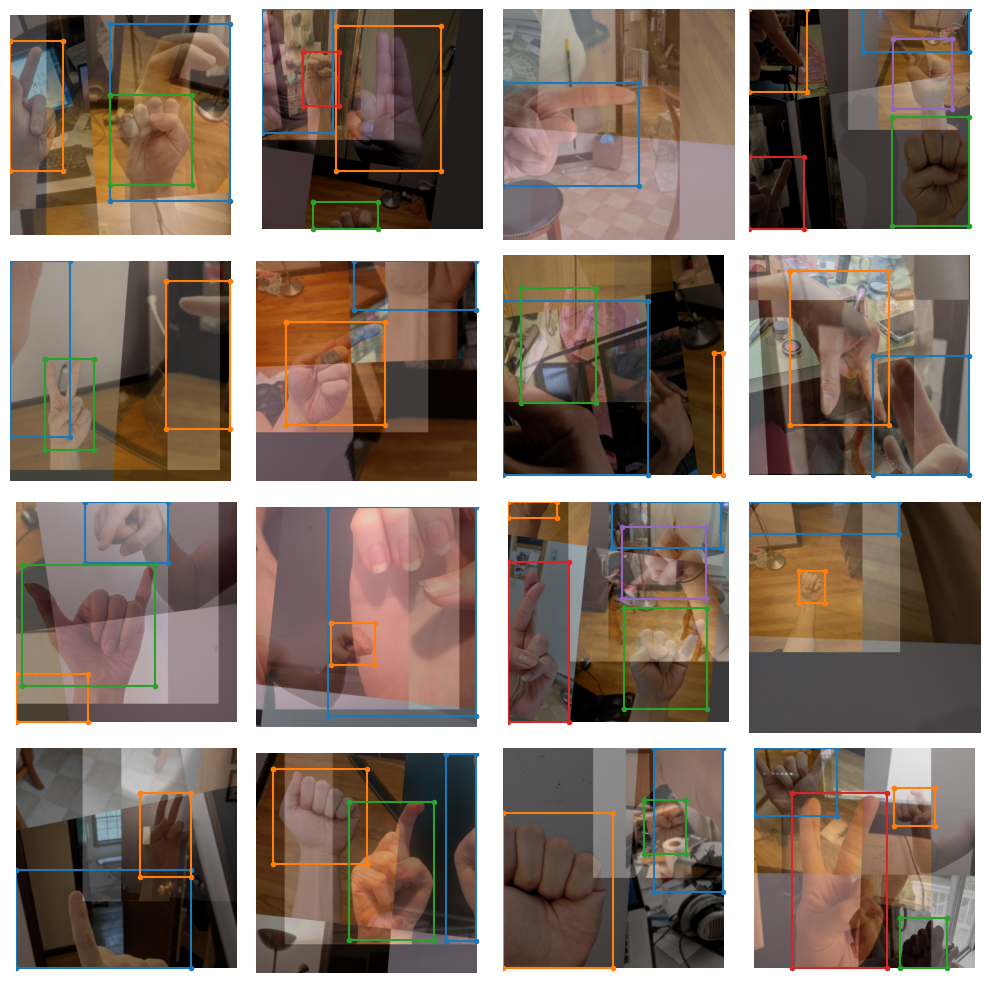

In [16]:
#step8
train_data.dataset.plot()


In [17]:
#step9
model = models.get('yolo_nas_s',
                   num_classes=len(dataset_params['classes']),
                   pretrained_weights="coco"
                   )

[2024-01-18 07:05:50] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-01-18 07:05:51] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_s


In [18]:
#step 10
train_params = {
    # ENABLING SILENT MODE
    'silent_mode': True,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    # ONLY TRAINING FOR 10 EPOCHS FOR THIS EXAMPLE NOTEBOOK
    "max_epochs": 25,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        # NOTE: num_classes needs to be defined here
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

In [67]:
!gdown "https://drive.usercontent.google.com/download?id=1uFX0wUMWSMwJKdCjwqgFRfzy0jBUFNqt&authuser=0"

Downloading...
From: https://drive.usercontent.google.com/download?id=1uFX0wUMWSMwJKdCjwqgFRfzy0jBUFNqt&authuser=0
To: /content/download?id=1uFX0wUMWSMwJKdCjwqgFRfzy0jBUFNqt&authuser=0
100% 14.0M/14.0M [00:00<00:00, 105MB/s] 


In [149]:
!gdown "https://drive.usercontent.google.com/download?id=1SJj_8EA_cZB8K7g9XTGXPP8Ui7PCNZix&authuser=0"

Downloading...
From: https://drive.usercontent.google.com/download?id=1SJj_8EA_cZB8K7g9XTGXPP8Ui7PCNZix&authuser=0
To: /content/download?id=1SJj_8EA_cZB8K7g9XTGXPP8Ui7PCNZix&authuser=0
100% 28.1M/28.1M [00:00<00:00, 111MB/s] 


In [50]:
#step12
trainer.train(model=model,
              training_params=train_params,
              train_loader=train_data,
              valid_loader=val_data)

[2024-01-18 07:44:09] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20240118_074409_218506`
[2024-01-18 07:44:09] INFO - sg_trainer.py - Checkpoints directory: checkpoints2/sign_yolonas_run2/RUN_20240118_074409_218506
[2024-01-18 07:44:09] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
initialize_param_groups and update_param_groups usages are deprecated since 3.4.0, will be removed in 3.5.0 and have no effect. 
 Assign different learning rates by passing a mapping of layer name prefixes to lr values through initial_lr training hyperparameter (i.e initial_lr={'backbone': 0.01, 'default':0.1})


The console stream is now moved to checkpoints2/sign_yolonas_run2/RUN_20240118_074409_218506/console_Jan18_07_44_09.txt


[2024-01-18 07:44:20] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Full dataset size:            504        (len(train_set))
    - Batch size per GPU:           16         (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             16         (num_gpus * batch_size)
    - Effective Batch size:         16         (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         31         (len(train_loader))
    - Gradient updates per epoch:   31         (len(train_loader) / batch_accumulate)
    - Model: YoloNAS_S  (19.03M parameters, 19.03M optimized)
    - Learning Rates and Weight Decays:
      - default: (19.03M parameters). LR: 0.0005 (19.03M parameters) WD: 0.0, (42.20K parameters), WD: 0.0001, (18.99M parameters)

[2024-01-18 07:46:19] INFO - base_sg_logger.py - Checkpoint saved i

In [160]:
from google.colab import drive
drive.mount('/content/drive')

Processing Video: 100%|██████████| 521/521 [00:27<00:00, 18.63it/s]


In [69]:
best_model = models.get('yolo_nas_s',
                        num_classes=len(dataset_params['classes']),
                        checkpoint_path="/content/checkpoints2/sign_yolonas_run2/RUN_20240118_051553_189903/ckpt_best.pth")



[2024-01-18 08:51:51] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/checkpoints2/sign_yolonas_run2/RUN_20240118_051553_189903/ckpt_best.pth EMA checkpoint.


In [70]:
trainer.test(model=best_model,
            test_loader=test_data,
            test_metrics_list=DetectionMetrics_050(score_thres=0.1,
                                                   top_k_predictions=300,
                                                   num_cls=len(dataset_params['classes']),
                                                   normalize_targets=True,
                                                   post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01,
                                                                                                          nms_top_k=1000,
                                                                                                          max_predictions=300,
                                                                                                          nms_threshold=0.7)
                                                  ))

Testing:  80%|████████  | 4/5 [00:06<00:01,  1.39s/it]

{'PPYoloELoss/loss_cls': 0.81680834,
 'PPYoloELoss/loss_iou': 0.17232192,
 'PPYoloELoss/loss_dfl': 0.38057008,
 'PPYoloELoss/loss': 1.3697006,
 'Precision@0.50': 0.11246199160814285,
 'Recall@0.50': 0.9791666865348816,
 'mAP@0.50': 0.8809364438056946,
 'F1@0.50': 0.1945170909166336}

Testing: 100%|██████████| 5/5 [00:07<00:00,  1.46s/it]


[2024-01-18 08:52:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


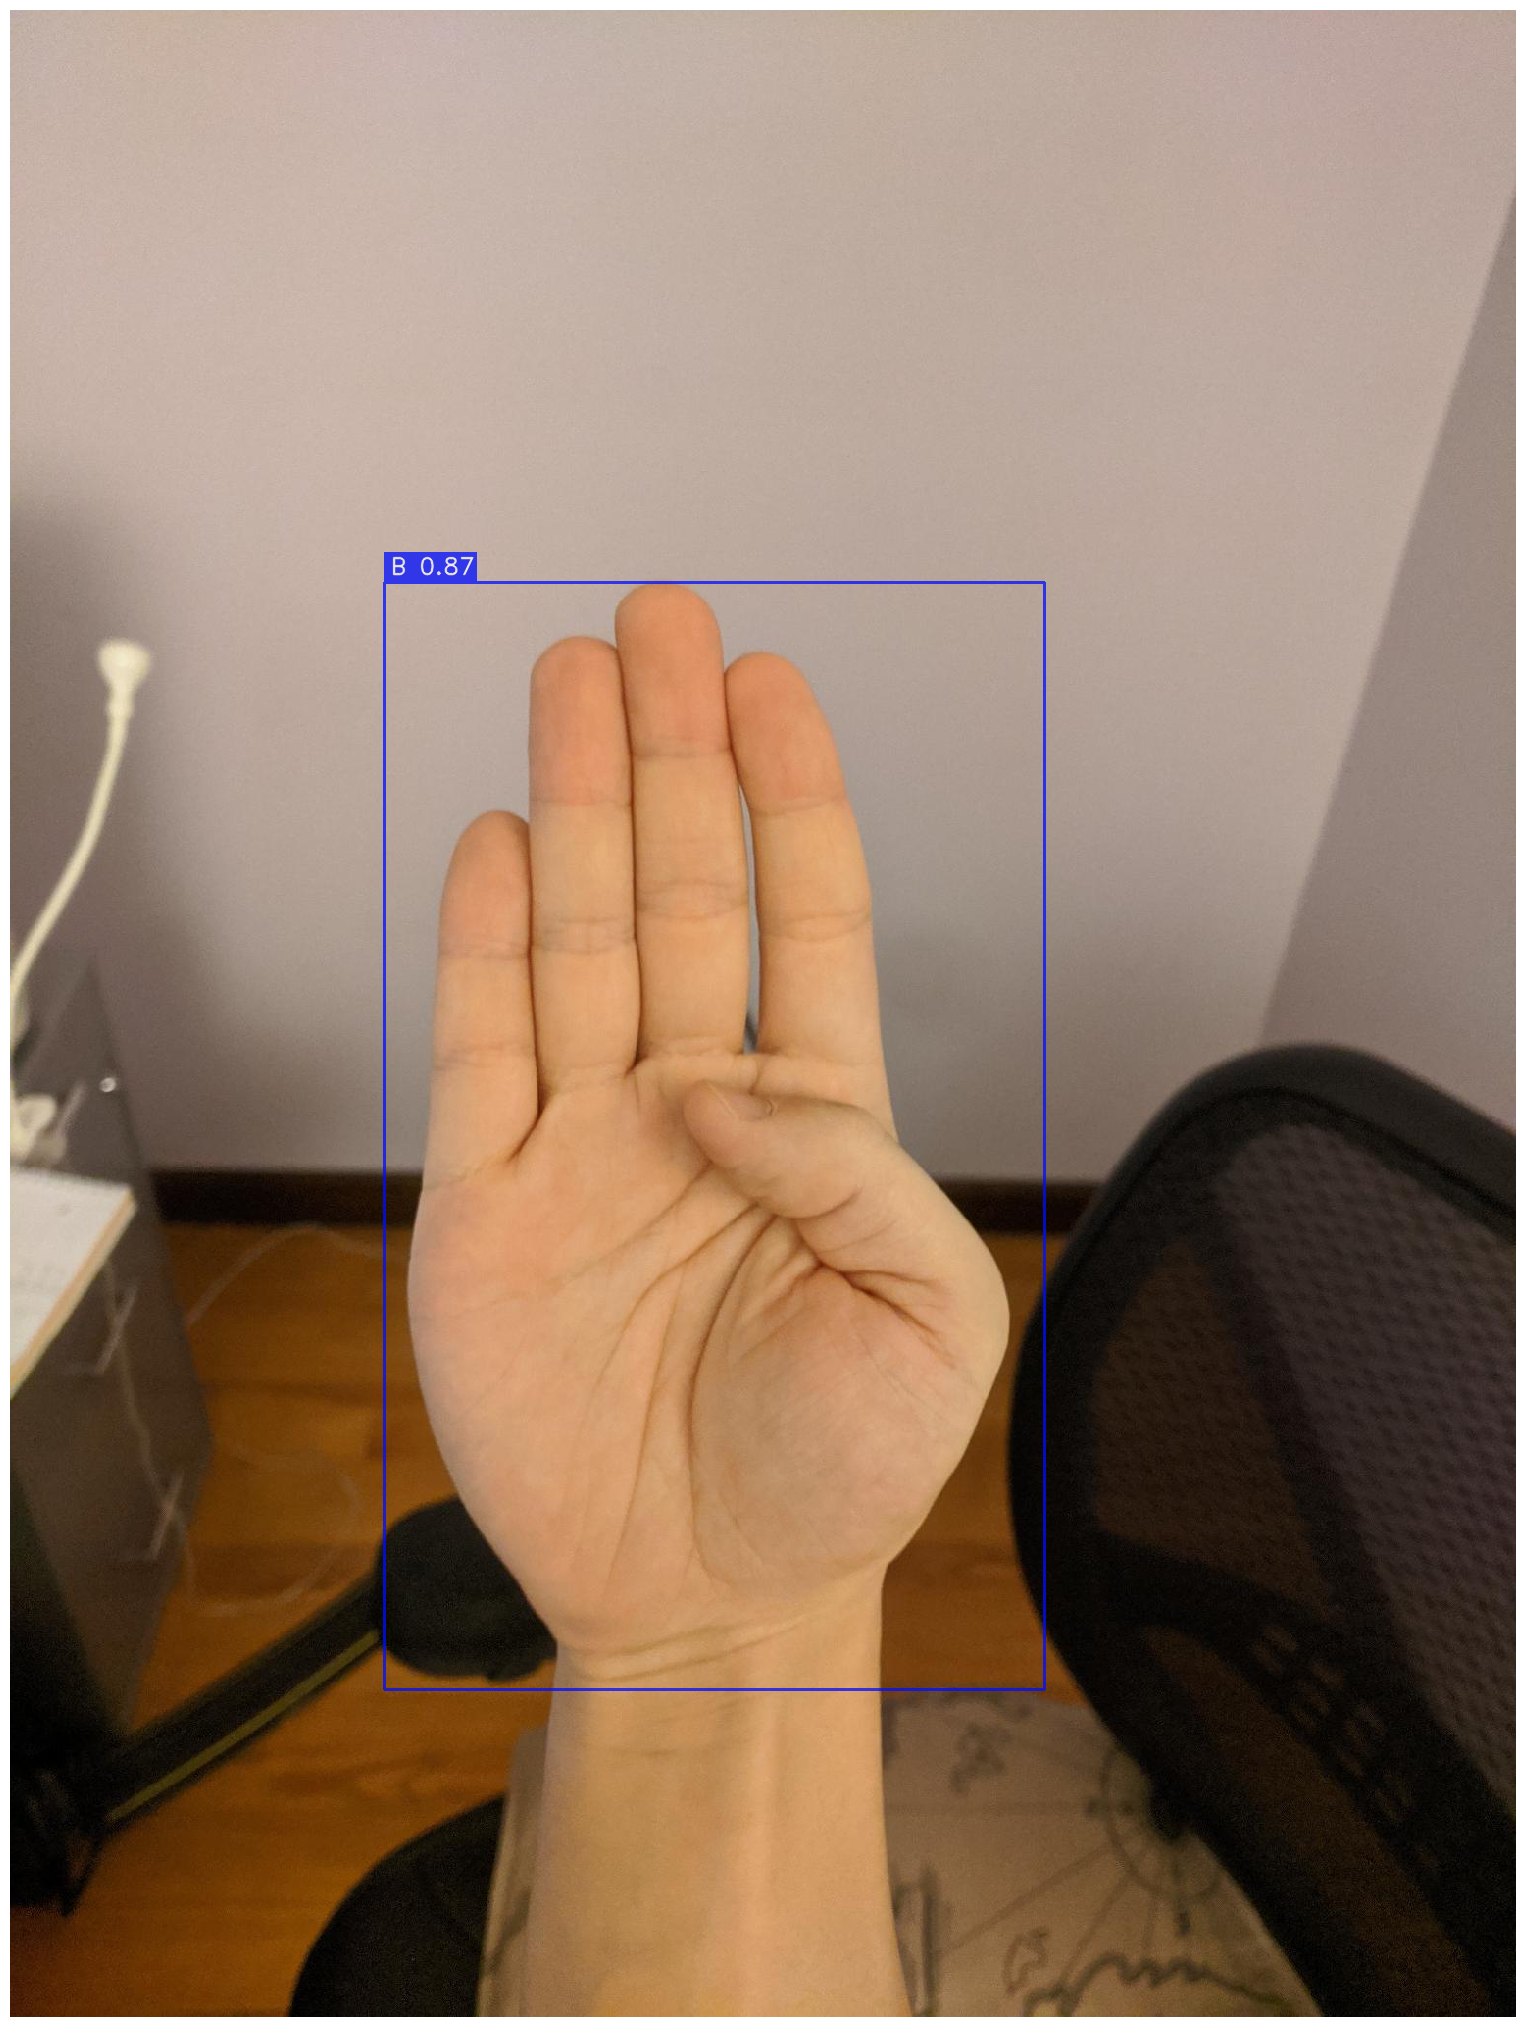

In [71]:
img_url = '/content/American-Sign-Language-Letters-6/valid/images/B1_jpg.rf.f37703350b03cd5d4d839a06d88a84bc.jpg'
best_model.predict(img_url).show()

In [207]:
input_video_path = f"/content/1.mp4"
output_video_path = "/content/detections.mp4"

In [208]:
import torch
device = 'cuda' if torch.cuda.is_available() else "cpu"


In [209]:
best_model.to(device).predict(input_video_path).save(output_video_path)


Processing Video:  98%|█████████▊| 510/521 [00:27<00:00, 24.74it/s]

In [210]:
!rm '/content/result_compressed.mp4'


In [211]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/detections.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
  <video width=400 controls>
    <source src="%s" type="video/mp4">
  </video>
    """ % data_url)



In [212]:
input_video_path = f"/2.mp4"
output_video_path = "2detections1.mp4"

In [213]:
import torch
device = 'cuda' if torch.cuda.is_available() else "cpu"

In [214]:
best_model.to(device).predict(input_video_path).save(output_video_path)

Processing Video:  97%|█████████▋| 623/640 [00:19<00:00, 29.34it/s]

In [215]:
import os

file_path = "/content/download?id=1SJj_8EA_cZB8K7g9XTGXPP8Ui7PCNZix&authuser=0"
if os.path.exists(file_path):
    print(f"File exists: {file_path}")
else:
    print(f"File does not exist: {file_path}")


File exists: /content/download?id=1SJj_8EA_cZB8K7g9XTGXPP8Ui7PCNZix&authuser=0


In [216]:
!rm '/content/result_compressed.mp4'


In [218]:
from IPython.display import HTML
from base64 import b64encode
import os


# Input video path
save_path = "/content/2detections1.mp4"

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
  <video width=400 controls>
    <source src="%s" type="video/mp4">
  </video>

""" % data_url)